# Proyecto de Análisis de Ventas de Videojuegos en Python




## Objetivo:
Explorar, analizar y visualizar datos históricos de ventas de videojuegos para identificar patrones, tendencias y métricas clave que puedan ser útiles para la industria.

### 1. Cagar y Limpieza de Datos 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [41]:
# === Cargando la Data ===
df = pd.read_csv('vgsales.csv')
df.head()

df.info()
df.describe(include='all')

# 1. Eliminar registros con valores nulos en columnas clave
df_clean = df.dropna(subset=['Year', 'Publisher']).copy()

# 2. Convertir 'Year' a entero
df_clean['Year'] = df_clean['Year'].astype(int)

# 3. Crear columna con la suma de ventas por región
df_clean['Regional_Sum'] = (
    df_clean['NA_Sales'] +
    df_clean['EU_Sales'] +
    df_clean['JP_Sales'] +
    df_clean['Other_Sales']
)

# 4. Comparar con 'Global_Sales' para validar consistencia
df_clean['Diff'] = abs(df_clean['Global_Sales'] - df_clean['Regional_Sum'])
print(f"Máxima diferencia entre Global_Sales y suma regional: {df_clean['Diff'].max():.4f}")

# 5. Reemplazar Global_Sales si hay diferencias
df_clean['Global_Sales'] = df_clean['Regional_Sum']

# 6. Eliminar duplicados si existen
df_clean.drop_duplicates(inplace=True)

# 7. Mostrar dataset limpio
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
Máxima diferencia entre Global_Sales y suma regional: 0.0200


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Regional_Sum,Diff
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,1.421085e-14
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,0.000000e+00
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,35.83,1.000000e-02
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,0.000000e+00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,31.38,1.000000e-02


### 2. Analisis Exploratorio (EDA)

#### 2.1 Distribucion de Ventas Globales

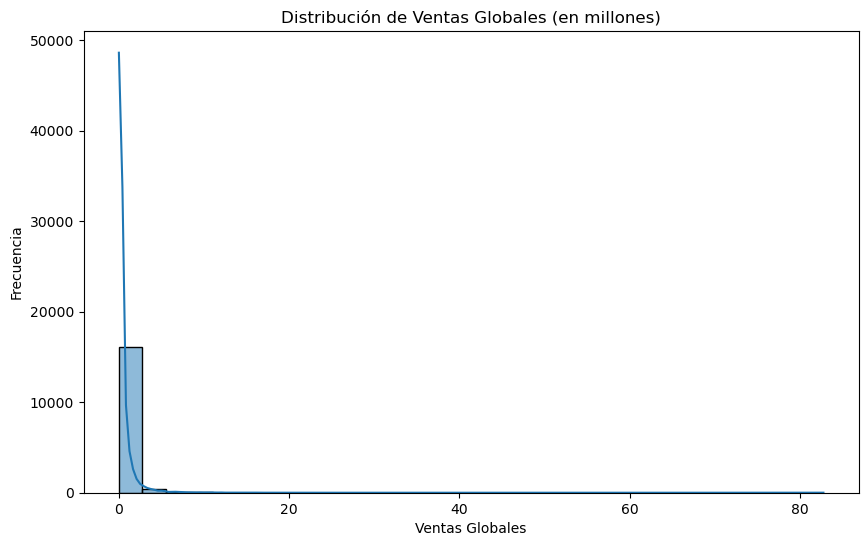

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], bins=30, kde=True)
plt.title('Distribución de Ventas Globales (en millones)')
plt.xlabel('Ventas Globales')
plt.ylabel('Frecuencia')
plt.show()

#### 2.2 Top 10 juegos mas Vendidos por Region

In [43]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for region in regions:
    top_10 = df.nlargest(10, region)[['Name', 'Platform', 'Year', region]]
    print(f"\nTop 10 en {region}:")
    print(top_10)


Top 10 en NA_Sales:
                         Name Platform    Year  NA_Sales
0                  Wii Sports      Wii  2006.0     41.49
1           Super Mario Bros.      NES  1985.0     29.08
9                   Duck Hunt      NES  1984.0     26.93
5                      Tetris       GB  1989.0     23.20
2              Mario Kart Wii      Wii  2008.0     15.85
3           Wii Sports Resort      Wii  2009.0     15.75
15         Kinect Adventures!     X360  2010.0     14.97
8   New Super Mario Bros. Wii      Wii  2009.0     14.59
7                    Wii Play      Wii  2006.0     14.03
18          Super Mario World     SNES  1990.0     12.78

Top 10 en EU_Sales:
                                            Name Platform    Year  EU_Sales
0                                     Wii Sports      Wii  2006.0     29.02
2                                 Mario Kart Wii      Wii  2008.0     12.88
3                              Wii Sports Resort      Wii  2009.0     11.01
10                         

#### 2.3 Evolución de Ventas por Año

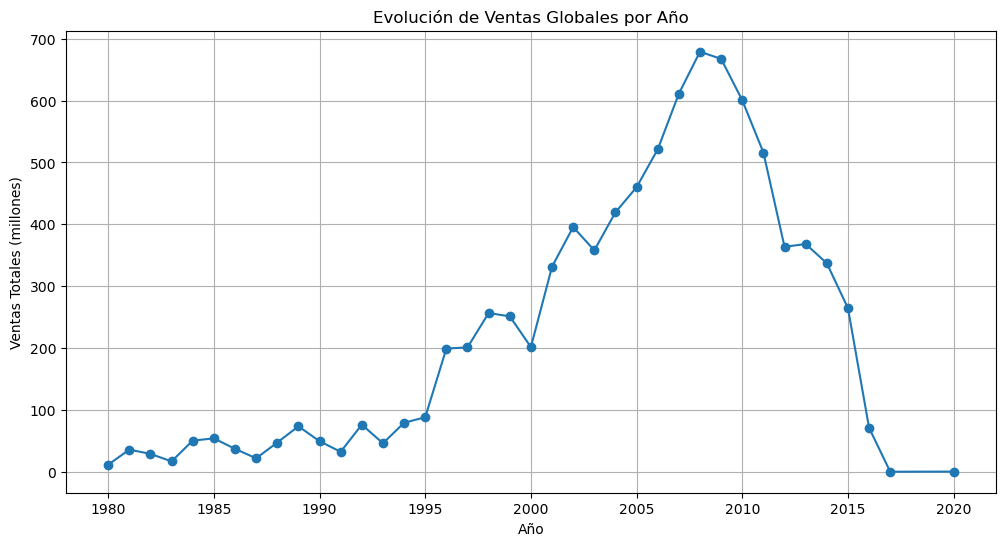

In [44]:
yearly_sales = df[df['Year'] > 0].groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(12, 6))
yearly_sales.plot(marker='o', linestyle='-')
plt.title('Evolución de Ventas Globales por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)
plt.show()

#### 2.4 Relacion entre Ventas en Diferentes Regiones

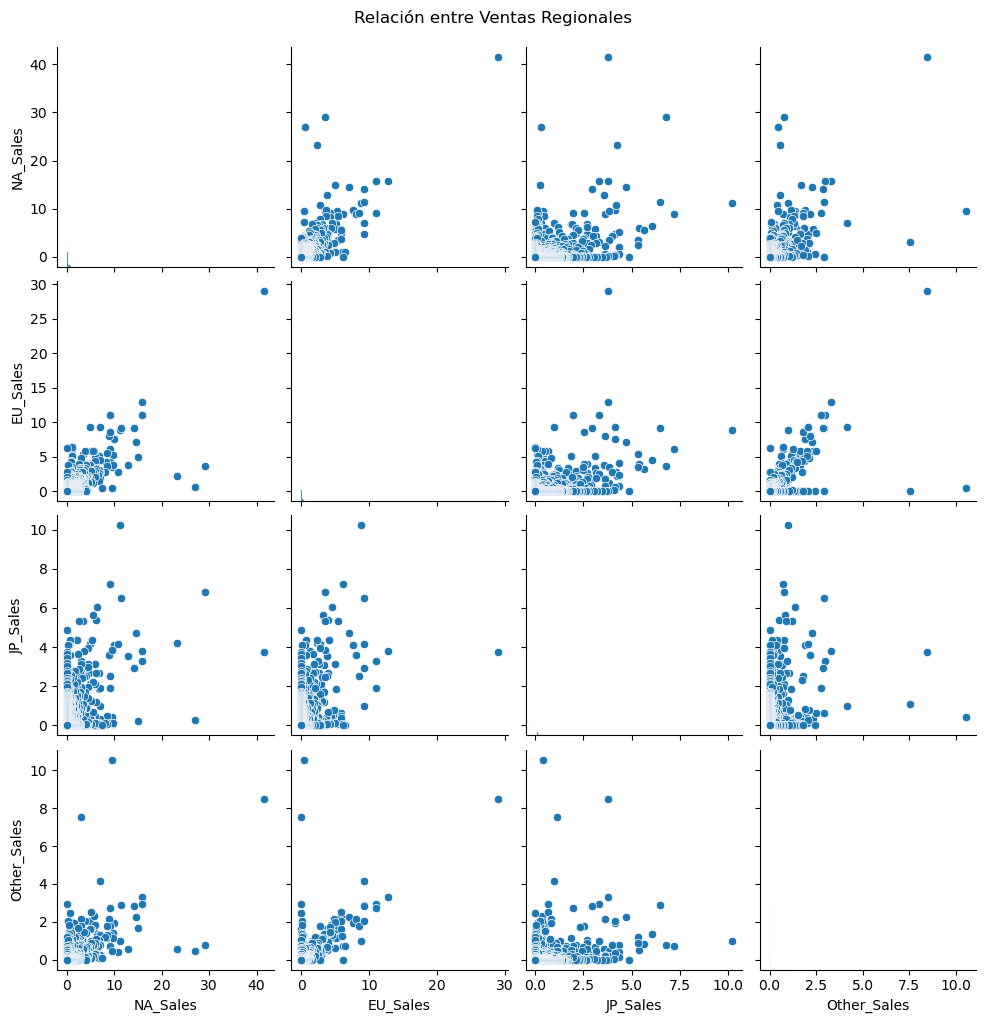

In [45]:
sns.pairplot(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])
plt.suptitle('Relación entre Ventas Regionales', y=1.02)
plt.show()

### 3. Analisis por Plataforma y Genero

#### 3.1 Ventas por Plataforma (TOP 10) 

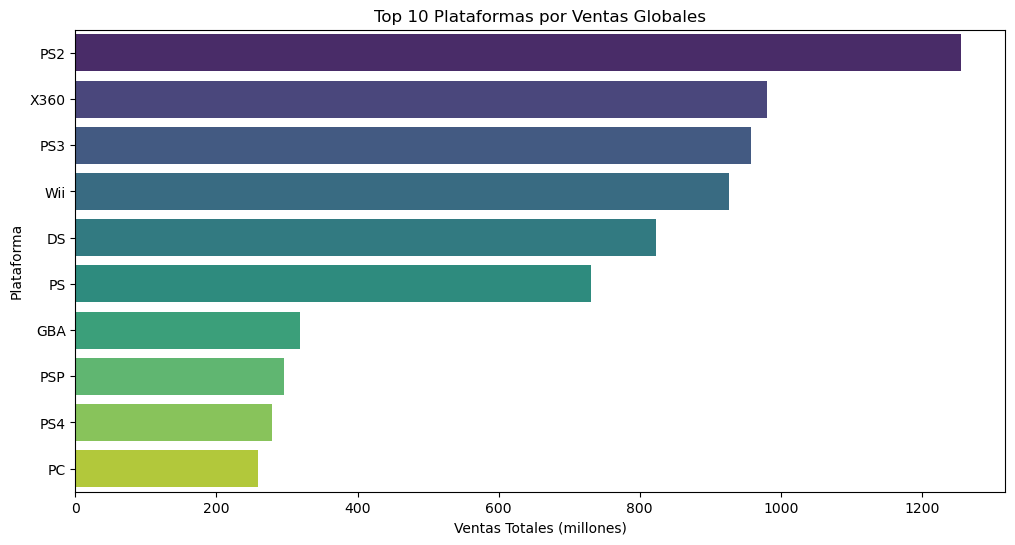

In [46]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales.values, y=platform_sales.index, palette='viridis')
plt.title('Top 10 Plataformas por Ventas Globales')
plt.xlabel('Ventas Totales (millones)')
plt.ylabel('Plataforma')
plt.show()

#### 3.2 Generos Mas Populares

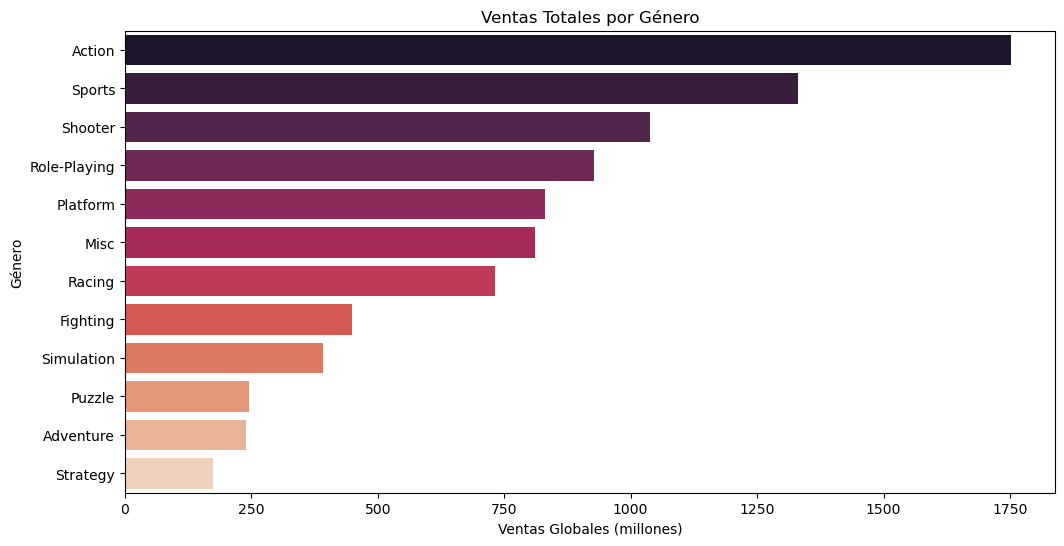

In [47]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='rocket')
plt.title('Ventas Totales por Género')
plt.xlabel('Ventas Globales (millones)')
plt.ylabel('Género')
plt.show()

#### 3.3 Generos con Mayor Promedio de Ventas por Juego

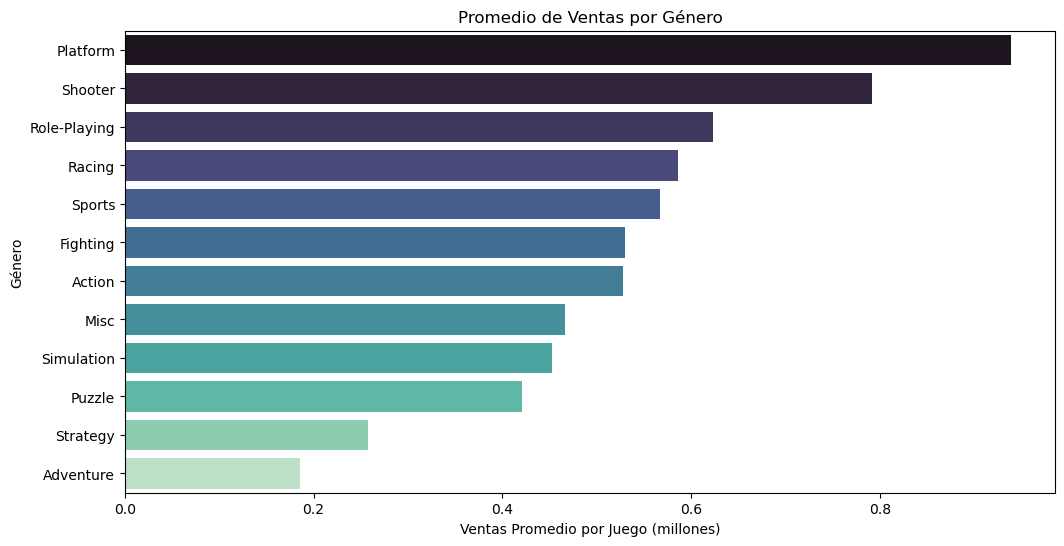

In [48]:
avg_sales_per_genre = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_sales_per_genre.values, y=avg_sales_per_genre.index, palette='mako')
plt.title('Promedio de Ventas por Género')
plt.xlabel('Ventas Promedio por Juego (millones)')
plt.ylabel('Género')
plt.show()

### 4. Anlasis de Editores 

#### 4.1 Top 10 Editores con Mas Ventas

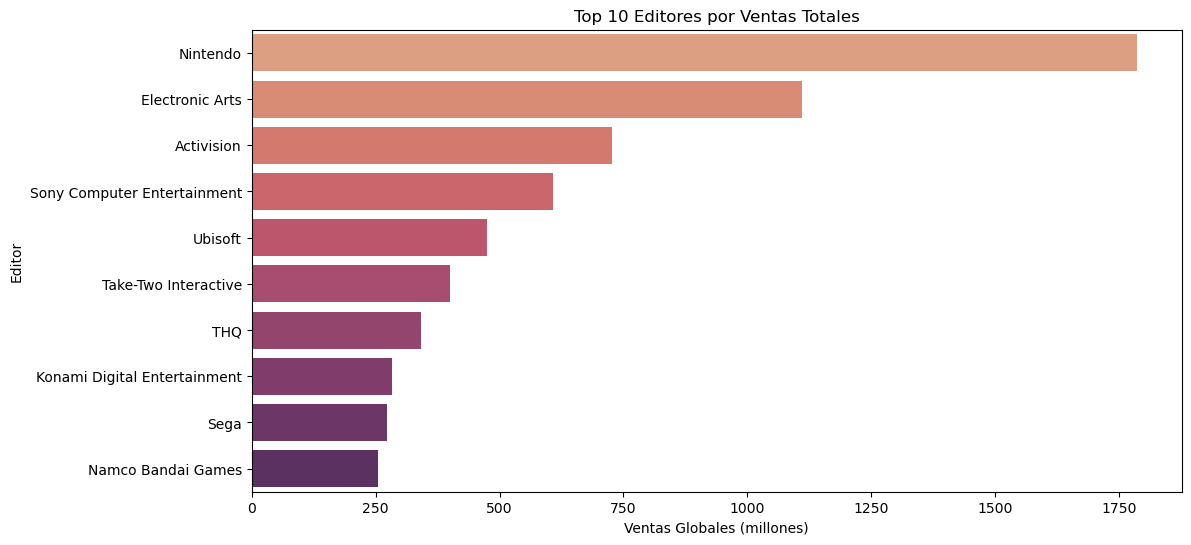

In [49]:
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='flare')
plt.title('Top 10 Editores por Ventas Totales')
plt.xlabel('Ventas Globales (millones)')
plt.ylabel('Editor')
plt.show()

#### 4.2 Distribucion de Ventas por Editor

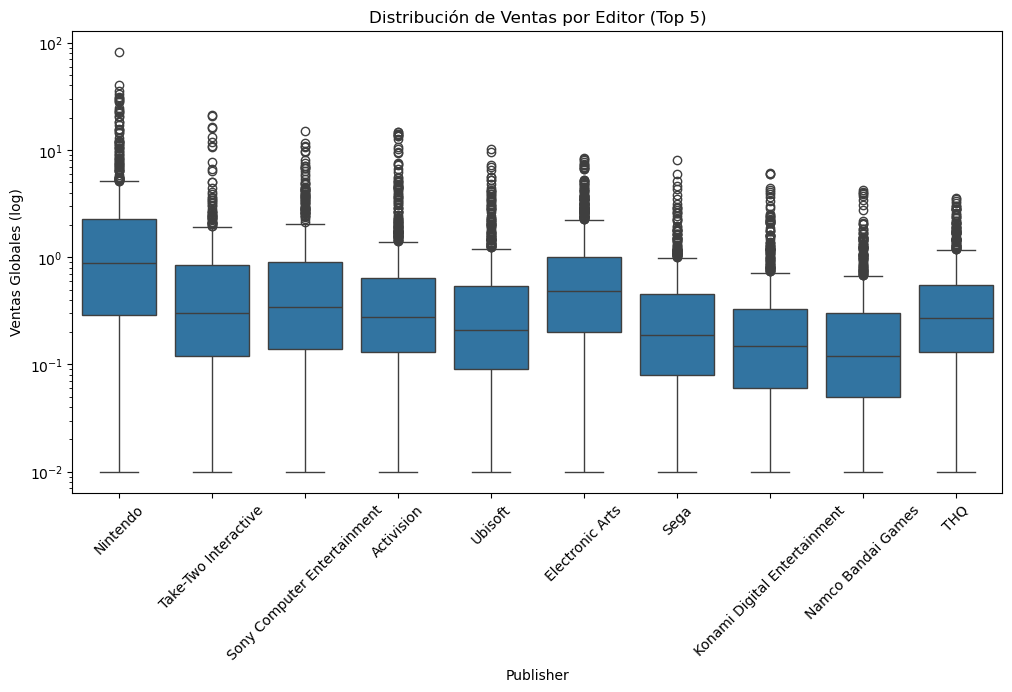

In [51]:
top_5_publishers = top_publishers.index.tolist()
filtered_df = df[df['Publisher'].isin(top_5_publishers)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Publisher', y='Global_Sales', data=filtered_df)
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.title('Distribución de Ventas por Editor (Top 5)')
plt.xticks(rotation=45)
plt.ylabel('Ventas Globales (log)')
plt.show()

### 5. Analisis Temporal 

#### 5.1 Ventas por Decada

In [52]:
# df['Decade'] = (df['Year'] // 10) * 10  # Agrupar por década
# decade_sales = df.groupby('Decade')['Global_Sales'].sum()

# plt.figure(figsize=(10, 6))
# sns.barplot(x=decade_sales.index, y=decade_sales.values, palette='magma')
# plt.title('Ventas Totales por Década')
# plt.xlabel('Década')
# plt.ylabel('Ventas Globales (millones)')
# plt.show()

#### 5.2 Evolucion de Platafromas 

<Figure size 1400x700 with 0 Axes>

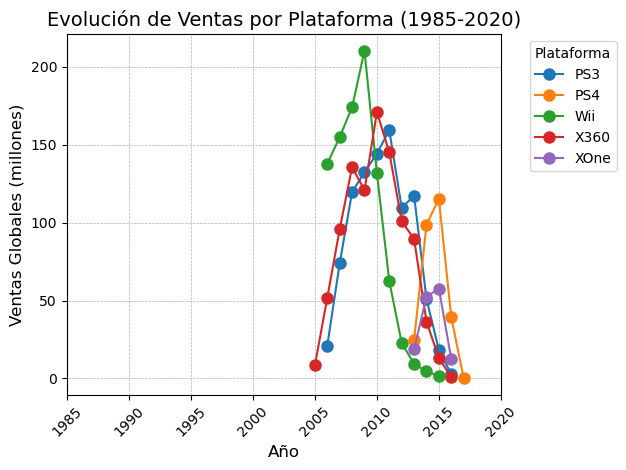

In [53]:
# Definir las plataformas de interés
platforms = ['Wii', 'PS3', 'X360', 'PS4', 'XOne']

# Filtrar por plataformas y rango de años (1985-2020)
platform_years = df[(df['Platform'].isin(platforms)) & (df['Year'] >= 1985) & (df['Year'] <= 2020)]

# Agrupar y desapilar los datos
platform_years = platform_years.groupby(['Year', 'Platform'])['Global_Sales'].sum().unstack()

# Reindexar para incluir todos los años en el rango (rellena con NaN donde no hay datos)
all_years = pd.DataFrame(index=range(1985, 2021))
platform_years = platform_years.reindex(all_years.index)

# Crear el gráfico
plt.figure(figsize=(14, 7))
platform_years.plot(marker='o', linestyle='-', markersize=8)

# Configuraciones del gráfico
plt.title('Evolución de Ventas por Plataforma (1985-2020)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ventas Globales (millones)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')

# Asegurar que todos los años se muestren en el eje x
plt.xticks(range(1985, 2021, 5), rotation=45)
plt.xlim(1985, 2020)

plt.tight_layout()
plt.show()

### 6. Conclusiones y Visualizacion 

### 6.1 Mapa de Calor de Correlación

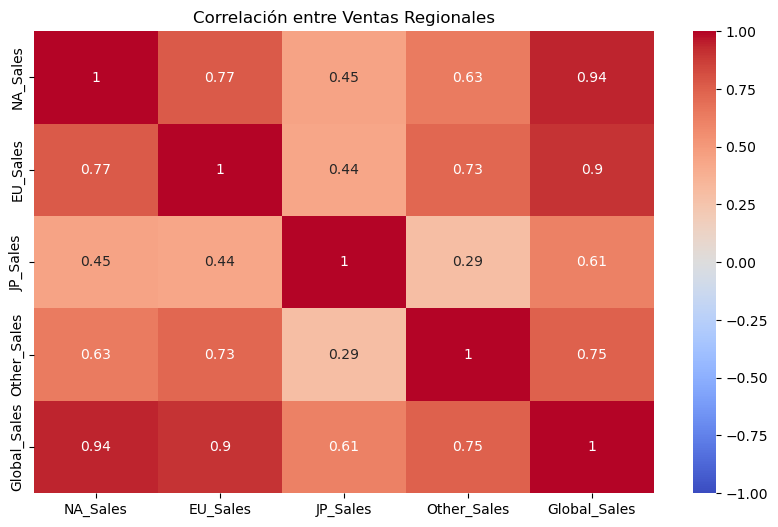

In [54]:
corr = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación entre Ventas Regionales')
plt.show()

### Conclusiones 

 - Nintendo domina claramente el mercado de videojuegos, apareciendo en los primeros   puestos tanto en juegos individuales como en ventas por editor.

- Las plataformas de Sony y Microsoft (PlayStation y Xbox) son las que generan mayores ventas, con PS2 liderando históricamente.

- Los géneros de acción, deportes y shooters son los más populares, lo que sugiere que los juegos más casuales y de ritmo rápido tienen mayor aceptación en el mercado.

- Las ventas alcanzaron su punto máximo alrededor de 2008-2009 y han estado disminuyendo desde entonces, posiblemente debido a cambios en los hábitos de consumo o la aparición de nuevas formas de entretenimiento.

- Norteamérica es el mercado más grande para videojuegos, seguido de Europa, con Japón en un distante tercer lugar.

- Los datos muestran la importancia de las franquicias establecidas (como Mario, Pokémon) y las plataformas exclusivas (como Wii) para generar ventas significativas.